FACIAL EMOTION RECOGNITION


In [ ]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/fer2013/fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
label_to_text={0:'Anger',1:'Disgust',2:'Fear',3:'Happy',4:'Sad',5:'Surprise',6:'Neutral'}

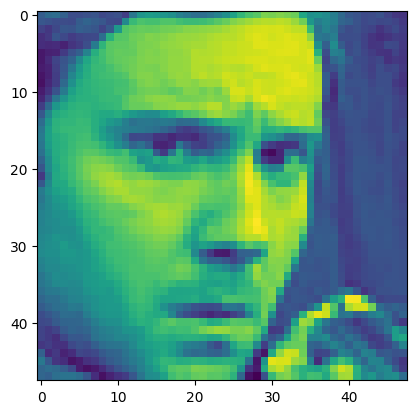

In [ ]:
pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48,1).astype('float'))

In [ ]:
img_array=df.pixels.apply(lambda x:np.array(x.split(' ')).reshape(48,48,1).astype('float32'))

In [ ]:
img_array=np.stack(img_array,axis=0)

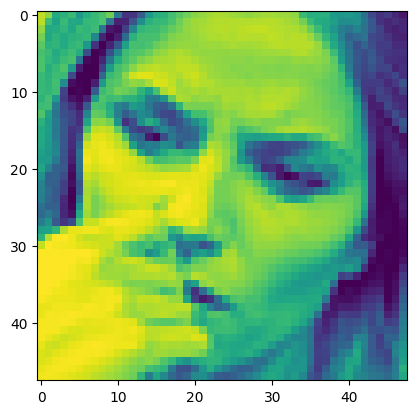

In [ ]:
pyplot.imshow(img_array[2])

In [ ]:
labels=df.emotion.values
len(labels)

35887

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(img_array,labels,test_size=0.2)

In [ ]:
y_train.shape

(28709,)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
import tensorflow as tf
import numpy as np
import os

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),


    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),


    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 4, 4, 128)       

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
try:
    os.mkdir('checkpoint')
except FileExistsError:
    pass

# Define the checkpoint file path
checkpoint_path = 'checkpoint/model_checkpoint.h5'

In [ ]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',verbose=1,save_freq='epoch',save_best_only=True,save_weights_only=False,mode='max')

In [ ]:
model.fit(X_train,y_train,epochs=50,validation_split=.1,callbacks=callback)

Epoch 1/50
808/808 [==============================] - ETA: 0s - loss: 0.7783 - accuracy: 0.8408
Epoch 1: val_accuracy improved from 0.52908 to 0.85371, saving model to checkpoint/model_checkpoint.h5
808/808 [==============================] - 6s 5ms/step - loss: 0.7783 - accuracy: 0.8408 - val_loss: 0.6093 - val_accuracy: 0.8537
Epoch 2/50
800/808 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.8730
Epoch 2: val_accuracy did not improve from 0.85371
808/808 [==============================] - 4s 5ms/step - loss: 0.4747 - accuracy: 0.8732 - val_loss: 0.5892 - val_accuracy: 0.8530
Epoch 3/50
799/808 [============================>.] - ETA: 0s - loss: 0.3836 - accuracy: 0.8922
Epoch 3: val_accuracy did not improve from 0.85371
808/808 [==============================] - 4s 5ms/step - loss: 0.3834 - accuracy: 0.8923 - val_loss: 0.7193 - val_accuracy: 0.8182
Epoch 4/50
805/808 [============================>.] - ETA: 0s - loss: 0.3132 - accuracy: 0.9116
Epoch 4: val_accur

In [ ]:
import tensorflow as tf

#tried using 0.2 test size

# Load the saved model
model = tf.keras.models.load_model('M91.h5')

# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)

print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_accuracy)


225/225 [==============================] - 1s 3ms/step - loss: 2.4095 - accuracy: 0.7324
Validation Loss: 2.409514904022217
Validation Accuracy: 0.7323766946792603


In [ ]:
model.fit(X_train,y_train,epochs=50,validation_split=.3,callbacks=callback)

Epoch 1/50
625/628 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9951
Epoch 1: val_accuracy improved from 0.89255 to 0.90421, saving model to checkpoint/model_checkpoint.h5
628/628 [==============================] - 6s 7ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.7637 - val_accuracy: 0.9042
Epoch 2/50
627/628 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9950
Epoch 2: val_accuracy improved from 0.90421 to 0.90828, saving model to checkpoint/model_checkpoint.h5
628/628 [==============================] - 3s 5ms/step - loss: 0.0187 - accuracy: 0.9950 - val_loss: 0.7246 - val_accuracy: 0.9083
Epoch 3/50
624/628 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9958
Epoch 3: val_accuracy improved from 0.90828 to 0.91443, saving model to checkpoint/model_checkpoint.h5
628/628 [==============================] - 4s 6ms/step - loss: 0.0156 - accuracy: 0.9959 - val_loss: 0.7241 - val_accuracy: 0.9144
Epoch 4/50

In [ ]:
model.save("M91.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('M.h5')

# Use the loaded model for predictions

In [ ]:
import cv2
from IPython.display import clear_output
import time

# Read the image using cv2
image = cv2.imread('im2.png')  # Replace with the actual image path

# Preprocess the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image if necessary
resized_image = cv2.resize(gray_image, (48, 48))

# Normalize the pixel values if necessary
normalized_image = resized_image / 255.0

# Reshape the image to match the expected input shape
reshaped_image = normalized_image.reshape((1, 48, 48, 1))

# Make predictions
predicted = loaded_model.predict(reshaped_image).argmax()
prediction_text = label_to_text[predicted]
print(prediction_text)




1/1 [==============================] - 0s 38ms/step
Fear
